In [69]:
%matplotlib inline

user-defined LaTeX commands
$\newcommand{\Er}{\mathcal{E}}$
$\newcommand{\Xset}{\mathcal{X}}$
$\newcommand{\Yset}{\mathcal{Y}}$
$\newcommand{\L}{\mathcal{L}}$
$\newcommand{\l}{\mathcal{l}}$
$\newcommand{\pr}{\mathbb{P}}$
$\newcommand{\E}{\mathbb{E}}$
$\newcommand{\D}{\mathbb{D}}$
$\newcommand{\w}{\mathbf{w}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\y}{\mathbf{y}}$
$\newcommand{\x}{\mathbf{x}}$
$\newcommand{\J}{\mathbf{J}}$
$\newcommand{\I}{\mathbf{I}}$
$\newcommand{\X}{\mathbf{X}}$
$\newcommand{\S}{\mathbf{S}}$
$\newcommand{\e}{\mathbf{e}}$
$\newcommand{\C}{\mathbf{C}}$
$\newcommand{\K}{\mathbf{K}}$
$\newcommand{\R}{\mathbf{R}}$
$\newcommand{\v}{\mathbf{v}}$
$\newcommand{\phivec}{\boldsymbol{\phi}}$
$\newcommand{\sign}{\mathrm{sign}}$

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
from math import *

In [72]:
from numpy.polynomial import polynomial as P

In [73]:
from copy import deepcopy

In [74]:
from scipy.optimize import minimize
from scipy.optimize import least_squares
from scipy.optimize import fmin

In [75]:
from ggplot import *
from matplotlib import colors as clrs
from matplotlib.colors import ListedColormap

In [76]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [77]:
from sklearn.linear_model import Lasso

In [78]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import multivariate_normal
from scipy.stats import laplace

In [79]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    n_class = len(np.unique(y))
    colors = list(clrs.cnames.keys())[:n_class]
    
    cmap = ListedColormap(colors[:n_class])
    # decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.xlim(xx2.min(), xx2.max())
    # plot samples
    X_test, y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), label=cl)
    # test samples highlight
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, s=55, label='test set')

### Linear Regression Model
* Regressor $\mathbf{x}=(x_1,\ldots,x_m)^T$, 
* parameter vector $\mathbf{w}=(w_1,\ldots,w_m)^T$, 
* desired response $y$. 
* Linear regression model: $$y=\mathbf{w}^T\mathbf{x}+\varepsilon$$. 
* Observations $Y=(y_1,\ldots,y_n)^T$

**Task:** given the joint distribution of $\mathbf{X}$ and $Y$ estimate parameter vector $\mathbf{w}$

* From the *Law of total probability* obtain
$$p_{\mathbf{w},Y|\mathbf{X}}(\mathbf{w},y|\mathbf{x})=p_{\mathbf{w}|Y,\mathbf{X}}(\mathbf{w}|y,\mathbf{x})p_Y(y)$$
or
$$p_{\mathbf{w},Y|\mathbf{X}}(\mathbf{w},y|\mathbf{x})=p_{Y|\mathbf{w},\mathbf{X}}(y|\mathbf{w},\mathbf{x})p_{\mathbf{w}}(\mathbf{w})$$
* and finally we get Bayes theorem statement:
$$p_{\mathbf{w}|Y,\mathbf{X}}(\mathbf{w}|y,\mathbf{x})=p_Y^{-1}(y)p_{Y|\mathbf{w},\mathbf{X}}(y|\mathbf{w},\mathbf{x})p_{\mathbf{w}}(\mathbf{w}),$$
where:
 * $\mathcal{l}(\mathbf{w}|y,\mathbf{x})=p_{Y|\mathbf{w},\mathbf{X}}(y|\mathbf{w},\mathbf{x})$ - observational density - likelihood function;
 * $\pi(\mathbf{w})=p_{\mathbf{w}}(\mathbf{w})$ - prior distribution for parameters $\mathbf{w}$;
 * $\pi(\mathbf{w}|y,\mathbf{x})=p_{\mathbf{w}|Y,\mathbf{X}}(\mathbf{w}|y,\mathbf{x})$ - posterior distribution;
 * $p_Y(y)$ - evidence - information, contained in $y$ - treated as normalizing constant. 

**Maximum Likelihood** estimate: 
$$\mathbf{w}_{ML}=\underset{\mathbf{w}}{\mathrm{argmax}}\left(\mathcal{l}(\mathbf{w}|y,\mathbf{x})\right)=\underset{\mathbf{w}}{\mathrm{argmax}}\log\left(\mathcal{l}(\mathbf{w}|y,\mathbf{x})\right)$$

**Maximum A Posteriori** estimate: 
$$\mathbf{w}_{MAP}=\underset{\mathbf{w}}{\mathrm{argmax}}\left(\pi(\mathbf{w}|y,\mathbf{x})\right)=\underset{\mathbf{w}}{\mathrm{argmax}}\log \left(\pi(\mathbf{w}|y,\mathbf{x})\right)$$

** Connection to $L_2$ regularization:**

* **Posterior density** in Gaussian case:
$$\pi(\mathbf{w}|y,\mathbf{x}) \propto \exp\thinspace\left(\underbrace{-\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i-\mathbf{w}^T\mathbf{x}_i)^2}_{\text{log-likelihood}}-\underbrace{\frac{1}{2\sigma_w^2}\|\mathbf{w}\|^2}_{\text{log-prior}}\right)$$

* Gaussian case, **regularized cost function** for MAP: 
$$J(\mathbf{w})=\underbrace{\frac{1}{2}\sum_{i=1}^n(y_i-\mathbf{w}^T\mathbf{x}_i)^2}_{\text{Empirical risk}}+\underbrace{\frac{\alpha}{2}\|\mathbf{w}\|^2}_{\text{Penalty}},$$
where $\alpha=\frac{\sigma^2}{\sigma_w^2}$

* Closed form solution: 
    * Solve the equation: $\displaystyle{\frac{\partial J}{\partial \w}=-2\x^T(\y-\x\w)+\alpha\w=0}$
    * Estimate: $\displaystyle{\hat{\w}=(\x^T\x+\alpha\I)^{-1}\x^T\y}$

**MAP estimate in gaussian case (matrix form)**

Define: 
* Correlation matrix $\mathbf{R}_{xx}(n)=-\sum_{i=1}^n\sum_{j=1}^n\mathbf{x}_i\mathbf{x}_j^T$
* Cross-correlation matrix $\mathbf{R}_{yx}(n)=-\sum_{i=1}^n\mathbf{x}_iy_i$

**MAP estimate in the matrix form**

$\hat{\mathbf{w}}_{MAP}(n)=(\mathbf{R}_{xx}(n)+\alpha\mathbf{I})^{-1}\mathbf{R}_{yx}(n)$, where $\mathbf{I}$ - $m\times m$ identity matrix

**ML estimate in the matrix form**

$\hat{\mathbf{w}}_{ML}(n)=\mathbf{R}_{xx}^{-1}(n)\mathbf{R}_{yx}(n)$

### Linear Regression Model Classifier

* Estimate coefficients $\hat{\w}$;
* Make a model prediction $\hat{y}=h(\hat{\w}^T\x)$, where $h$ - quantizer function;
* Obtain score $\displaystyle{\frac{1}{n}\sum_{i=1}^n\I_{\{y_i=\hat{y}_i\}}}$

## Toy data for classification

In [80]:
X, y = make_moons(noise=0.1, n_samples=1000)

In [81]:
X,y = make_blobs(centers=2, n_samples=1000, cluster_std=3)

In [82]:
X = scale(X)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
dat = {'x': X_train.T[0], 'y': X_train.T[1], 'variable': y_train}

In [84]:
dat = pd.DataFrame(dat)
dat['color'] = ['red' if variable == 0 else 'blue' for variable in dat['variable']]

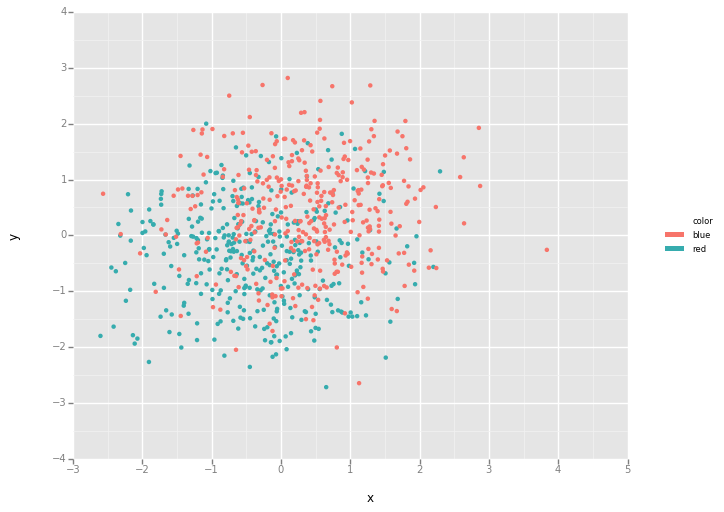

<ggplot: (295109601)>

In [85]:
ggplot(aes(x='x', y='y', group='variable',color='color'),dat) + geom_point()

In [87]:
def MAP(X, y, alpha=0.0):
    m = X.shape[1]
    I = np.identity(m)
    Rxx = np.dot(X.T, X)
    Ryx = np.dot(X.T, y)
    if alpha == 0.0:
        return np.dot(np.linalg.inv(Rxx), Ryx)
    elif alpha > 0.0:
        return np.dot(np.linalg.inv(Rxx + alpha * I), Ryx)

In [88]:
def step_function(x, margin=0, label=[0, 1]):
    return np.where(x >= margin, label[1], label[0])

In [89]:
class LinearRegressionClassifier(object):
    def __init__(self, alpha=0.0):
        self.alpha_ = alpha

    def fit(self, X, y, alpha=None):
        if alpha == None:
            alpha = self.alpha_
        self.coef_ = MAP(X, y, alpha)
        return self

    def predict(self, X):
        y = np.dot(X, self.coef_)
        self.y_ = step_function(y)
        return self.y_

    def score(self, X, y):
        return (self.predict(X) == y).astype(float).sum() / len(y)

In [90]:
clf = LinearRegressionClassifier(alpha=0.0)
clf.fit(X_train, y_train)
clf.predict(X_test)

print('Train score %.3f, Test score %.3f' % (clf.score(X_train, y_train), clf.score(X_test, y_test)))

Train score 0.735, Test score 0.720


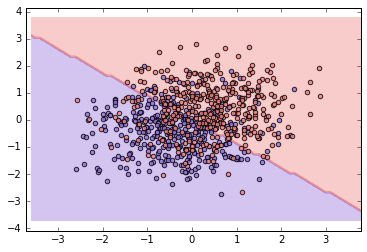

In [91]:
plot_decision_regions(X_train, y_train, clf, resolution=0.1)

### Linear Regression Model for regression task

* Estimate coefficients $\hat{\w}$;
* Make a model prediction $\hat{y}=\hat{\w}^T\x$;
* Obtain score $\displaystyle{\mathrm{R}^2=1-\frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}}$, where $\displaystyle{\bar{y}=\frac{1}{n}\sum_{i=1}^ny_i}$

In [93]:
class RidgeLinearRegression(object):
    def __init__(self, alpha=0.0):
        self.alpha_ = alpha

    def fit(self, X, y, alpha=None):
        if alpha == None:
            alpha = self.alpha_
        self.coef_ = MAP(X, y, alpha)
        return self.predict(X)

    def predict(self, X):
        self.y_ = np.dot(X, self.coef_)
        return self.y_

    def score(self, X, y):
        return 1. - np.sum((y-self.predict(X))**2)/np.var(y)/len(y)

**Linear Regression for Polynomial model**

* Polynomial model $\displaystyle{y=\mathrm{P}_m(\w, \x)}$, where $\displaystyle{\mathrm{P}_m(\w, \x)=w_0+\sum_{i=1}^mw_ix^i}$
* Input vector in matrix form $\x=(1,x,\ldots,x^m)$
* The same linear regression model $\y=\w^T\x+\varepsilon$

In [94]:
def poly(c, x):
    y = np.zeros_like(x)
    for i in np.arange(len(c)):
        y = y + c[i] * x ** i
    return y

$$\displaystyle{f(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)}$$

$$\displaystyle{f(x)=\frac{1}{2\sigma}\exp\left(-\frac{|x-\mu|}{\sigma}\right)}$$

In [25]:
# laplace noise
N = 100
sigma = .2
x = np.linspace (-2, 2, 2*N)
c = [0,0,1]
ytrue = poly(c, x)
y = ytrue + norm(scale=sigma).rvs(size=2*N)

In [95]:
# normal noise
N = 100
sigma = .2
x = np.linspace (-2, 2, 2*N)
c = [0,0,1]
ytrue = poly(c, x)
y = ytrue + norm(scale=sigma).rvs(size=2*N)

In [98]:
x_train = x[:N]
y_train = y[:N]
ytrue_train = ytrue[:N]

In [99]:
x_test = x[N:]
y_test = y[N:]
ytrue_test = ytrue[N:]

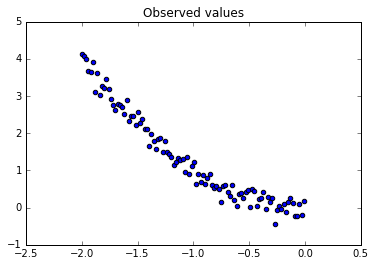

In [100]:
plt.scatter(x_train,y_train)
plt.title('Observed values');

In [101]:
deg = 7

In [102]:
def poly_input(x, deg):
    data = pd.DataFrame(np.vstack((np.ones(len(x)), x)).T, columns=['1', 'x'])
    for i in range (2, deg + 1):
        colname = 'x^%d' % i
        data[colname] = data['x'] ** i
    return data

In [103]:
poly_input(x_train, deg).head()

,1,x,x^2,x^3,x^4,x^5,x^6,x^7
0,1.0,-2.000000,4.000000,-8.000000,16.000000,-32.000000,64.000000,-128.000000
1,1.0,-1.979899,3.920002,-7.761210,15.366416,-30.423959,60.236381,-119.261981
2,1.0,-1.959799,3.840812,-7.527220,14.751838,-28.910636,56.659036,-111.040322
3,1.0,-1.939698,3.762430,-7.297980,14.155881,-27.458142,53.260516,-103.309343
4,1.0,-1.919598,3.684856,-7.073443,13.578167,-26.064622,50.033596,-96.044391


In [104]:
X_train = poly_input(x_train, deg).values

In [105]:
X_test = poly_input(x_test, deg).values

In [135]:
lr = RidgeLinearRegression(alpha=2.)
yhat = lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.97846010344606105

In [136]:
dat = pd.DataFrame (np.column_stack ([x_train, y_train, yhat, ytrue_train]), columns =['x', 'y', 'yhat', 'ytrue'])

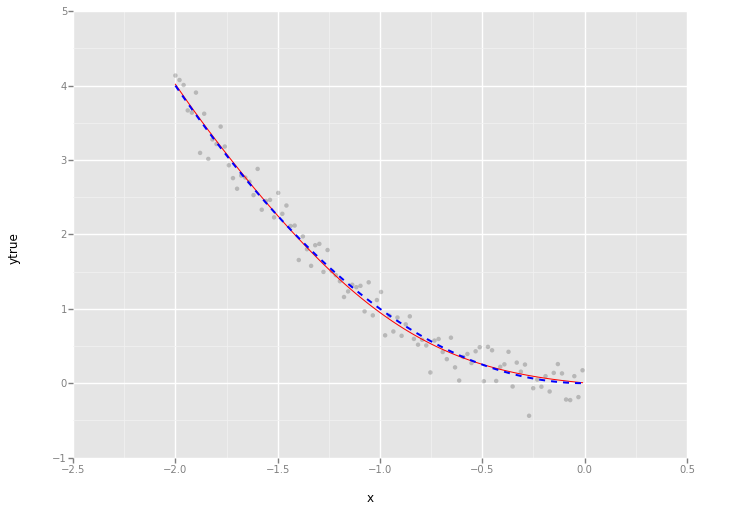

<ggplot: (-9223372036558008807)>

In [137]:
ggplot(aes ('x', 'y'), data=dat) + geom_point (alpha = 0.2) \
        + geom_line (aes ('x', 'yhat'), color = 'red', size = 1) \
        + geom_line (aes ('x', 'ytrue'), color = 'blue', linetype = 'dashed', size = 2) 

**Model generalization ability**

In [138]:
X = poly_input(x, deg).values
yfit = lr.predict(X)

In [139]:
dat = pd.DataFrame (np.column_stack ([x, y, yfit, ytrue]), columns =['x', 'y', 'yhat', 'ytrue'])

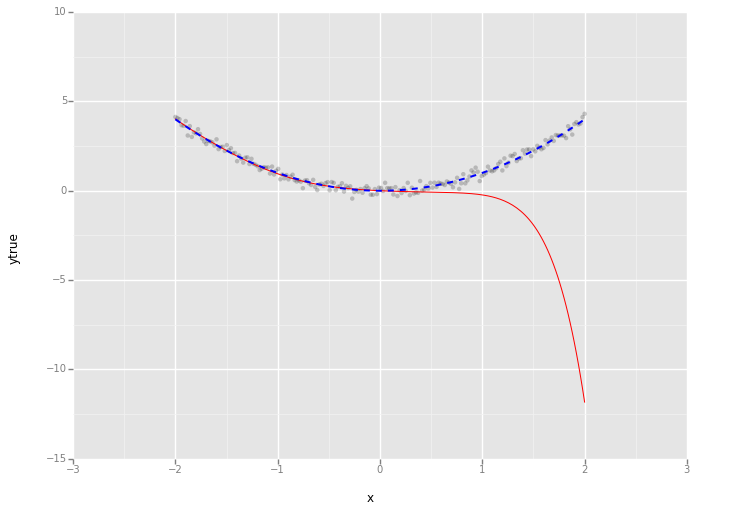

<ggplot: (-9223372036557877781)>

In [140]:
ggplot(aes ('x', 'y'), data=dat) + geom_point (alpha = 0.2) \
        + geom_line (aes ('x', 'yhat'), color = 'red', size = 1) \
        + geom_line (aes ('x', 'ytrue'), color = 'blue', linetype = 'dashed', size = 2) 

In [125]:
tc = np.zeros(deg+1)
tc[:len(c)] = c

In [126]:
coef_df = pd.DataFrame (np.column_stack ((lr.coef_, tc, np.arange (deg + 1))), columns =['c', 'Tc', 'deg'])
coef_df

,c,Tc,deg
0,0.042875,0.0,0.0
1,1.724341,0.0,1.0
2,12.599290,1.0,2.0
3,29.211270,0.0,3.0
4,34.145780,0.0,4.0
5,19.776036,0.0,5.0
6,5.396153,0.0,6.0
7,0.531190,0.0,7.0


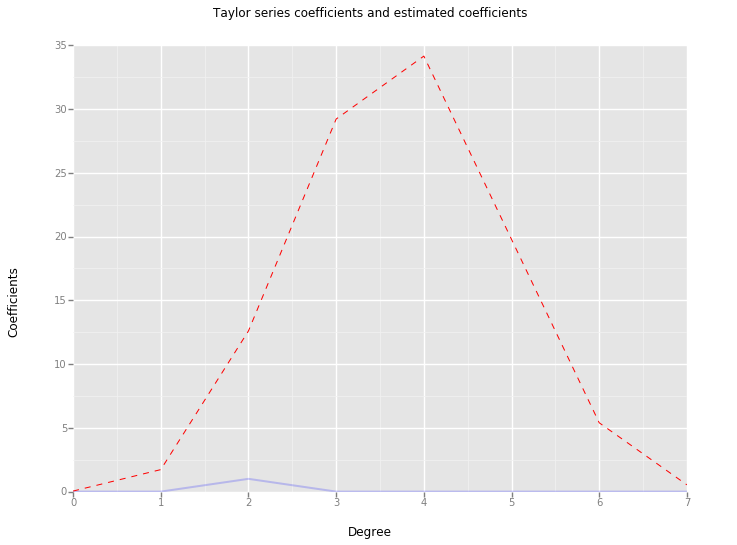

<ggplot: (295224531)>

In [127]:
ggplot(aes ('deg', 'Tc'), data=coef_df) + geom_line (color = 'blue', size = 2, alpha = 0.2) \
        + geom_line (aes ('deg', 'c'), color = 'red', linetype = 'dashed', size = 1) + \
        labs (title = 'Taylor series coefficients and estimated coefficients', x = 'Degree', y = 'Coefficients')

In [128]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1., 10., 100.]
coef = []
for alpha in alphas:
    lr = RidgeLinearRegression(alpha=alpha)
    yhat = lr.fit(X_train, y_train)
    coef.append(lr.coef_)
coef = np.array(coef)
coef_df = pd.DataFrame(coef)
coef_df['alpha'] = np.log10(alphas)
coef_df

,0,1,2,3,4,5,6,7,alpha
0,0.003566,0.725057,6.304201,12.631374,12.304275,4.599198,0.078618,-0.208856,-5.0
1,-0.023037,0.125944,2.874292,4.275211,1.989971,-2.181874,-2.186460,-0.511211,-4.0
2,-0.054482,-0.406530,0.774477,1.290078,0.717919,-1.563208,-1.533283,-0.369134,-3.0
3,-0.054762,-0.553220,-0.079530,0.012808,0.624859,-0.496963,-0.779827,-0.214981,-2.0
4,-0.022118,-0.300256,0.199963,-0.290193,0.342270,-0.104658,-0.349275,-0.108855,-1.0
5,-0.010344,-0.260951,0.309151,-0.294877,0.202585,-0.019779,-0.164156,-0.051362,0.0
6,0.071656,-0.211594,0.225430,-0.202628,0.147222,-0.059624,-0.031665,0.010499,1.0
7,0.094131,-0.109979,0.117430,-0.123088,0.122649,-0.106601,0.057732,0.053908,2.0


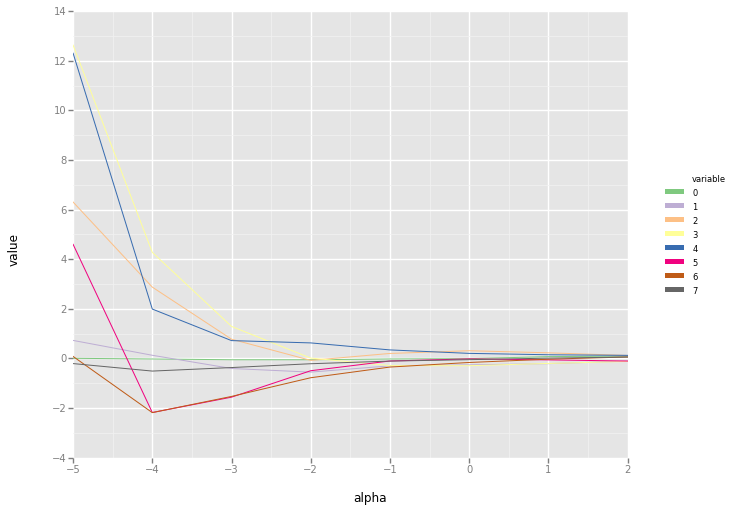

<ggplot: (295701140)>

In [118]:
df = pd.melt(coef_df, id_vars=['alpha'])
ggplot(aes(x='alpha', y='value',group='variable', color='variable'), data=df)+geom_path()+scale_color_brewer(type='qual')

**Model complexity selection**

In [141]:
alpha = 2.0
degrees = np.arange(1, 8)
train_score = []
test_score = []
for deg in degrees:
    X_train = poly_input(x_train, deg).values
    X_test = poly_input(x_test, deg).values
    lr = RidgeLinearRegression(alpha=alpha)
    yhat = lr.fit(X_train, y_train)
    train_score.append(lr.score(X_train, y_train))
    test_score.append(lr.score(X_test, y_test))
test_score = np.array(test_score)
train_score = np.array(train_score)

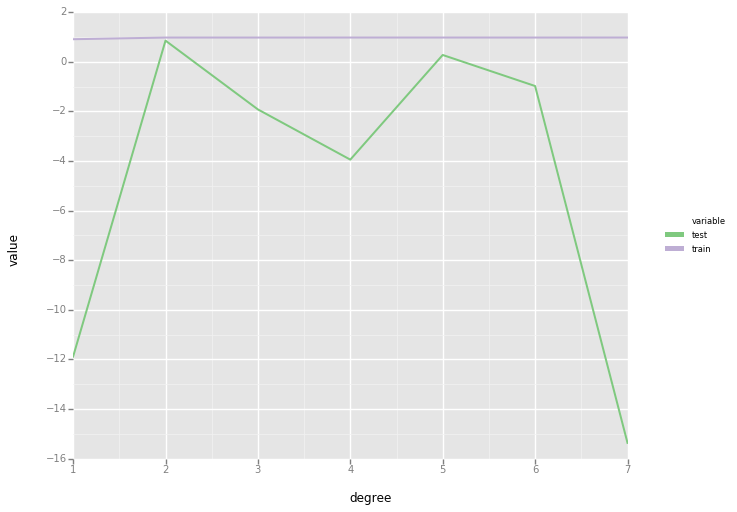

<ggplot: (-9223372036558016224)>

In [142]:
df = pd.DataFrame(np.vstack((train_score, test_score, degrees)).T, columns=['train', 'test', 'degree'])
df = pd.melt(df, id_vars=['degree'])
ggplot(aes(x='degree', y='value',group='variable', color='variable'), data=df)+geom_line(size=2)+scale_color_brewer(type='qual')

** Connection to $L_1$ regularization:**

* **Posterior density** in Gaussian case with Laplace prior:
$$\pi(\mathbf{w}|y,\mathbf{x}) \propto \exp\thinspace\left(\underbrace{-\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i-\mathbf{w}^T\mathbf{x}_i)^2}_{\text{log-likelihood}}-\underbrace{\frac{1}{\sigma_w}|\mathbf{w}|}_{\text{log-prior}}\right)$$

* Gaussian case, **regularized cost function** for MAP: 
$$J(\mathbf{w})=\underbrace{\frac{1}{2}\sum_{i=1}^n(y_i-\mathbf{w}^T\mathbf{x}_i)^2}_{\text{Empirical risk}}+\underbrace{\alpha|\mathbf{w}|}_{\text{Penalty}},$$
where $\alpha=\frac{\sigma^2}{\sigma_w}$

* No closed-form solution in this case, but can be interpreted as:
    * minimize $J_0(\w)$ subject to the constraint $\displaystyle{\sum_{i=0}^m|w_j|\leq \eta}$ for some $\eta$, where $J_0(\w)$ stands for cost function of original (unconstrained) maximum likelihood.
    * Suppose $w_j>0$, then $$\displaystyle{\frac{\partial J}{\partial w_j}=\sum_i\left(y_i-\sum_{k\neq j}w_kx_{ki} - w_jx_{ji}\right)x_{ji}-\alpha=\sum_i\left(y_i-\sum_{k\neq j}w_kx_{ki}\right)x_{ji}-w_j\sum_ix^2_{ji}-\alpha}$$
    and $$\displaystyle{\hat{w}_j=\underbrace{\frac{\sum_i\left(y_i-\sum_{k\neq j}w_kx_{ki}\right)x_{ji}}{\sum_ix^2_{ji}}}_{\hat{w}_j^{ML}}-\frac{\alpha}{\sum_ix^2_{ji}}}$$
    which (keeping in mind, that $w_j>0$) means that we admit a solution only in case if $\displaystyle{\hat{w}_j^{ML}>\frac{\alpha}{\sum_ix^2_{ji}}}$
    * Combining both variants we obtain
    $$\displaystyle{\hat{w}_j=\left\{\begin{array}{ll}
    \hat{w}_j^{ML}-\eta_j\sign(\hat{w}_j^{ML}), & |\hat{w}_j^{ML}|>\eta_j \\
    0, & |\hat{w}_j^{ML}|\leq\eta_j
    \end{array}\right.}$$
    where $\displaystyle{\eta_j=\frac{\alpha}{\sum_ix^2_{ji}}}$
    
See http://www.cs.bham.ac.uk/~axk/laplace.pdf

In [143]:
def soft_treshold(x, a):
    if abs(x) > a:
        return x - a*np.sign(x)
    else:
        return 0

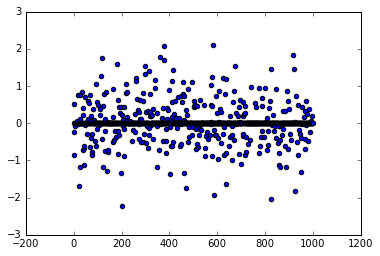

In [145]:
z = norm.rvs(size=1000)
zt = [soft_treshold(zi, 1.) for zi in z]
plt.scatter(np.arange(1000),zt);

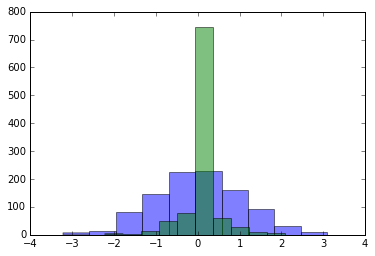

In [146]:
plt.hist(z, bins=10, alpha=0.5)
plt.hist(zt, bins=10, alpha=0.5);

In [147]:
def coord_descent(X, y, alpha=0.1, max_iter=100):
    w = np.zeros(X.shape[1])
    for it in range(max_iter):
        for j in range(len(w)):
            wj = deepcopy(w)
            wj[j] = 0.
            rj = y - np.dot(X, wj)
            x = np.dot(X[:,j], rj)
            a = alpha*X.shape[0]
            w[j] = soft_treshold(x, a)/(X[:,j]**2).sum()
    return w

In [148]:
def MAP_L1(X, y, alpha=0.0):
    m = X.shape[1]
    I = np.identity(m)
    Rxx = np.dot(X.T, X)
    Ryx = np.dot(X.T, y)
    if alpha == 0.0:
        return np.dot(np.linalg.inv(Rxx), Ryx)
    elif alpha > 0.0:
        return coord_descent(X, y, alpha)

In [149]:
class LassoLinearRegression(object):
    def __init__(self, alpha=0.1):
        self.alpha_ = alpha

    def fit(self, X, y, alpha=None):
        if alpha == None:
            alpha = self.alpha_
        self.coef_ = MAP_L1(X, y, alpha)
        return self.predict(X)

    def predict(self, X):
        self.y_ = np.dot(X, self.coef_)
        return self.y_

    def score(self, X, y):
        return 1. - np.sum((y-self.predict(X))**2)/np.var(y)/len(y)

In [150]:
lr = LassoLinearRegression(alpha=.1)
yhat = lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.96838884397073022

In [151]:
dat = pd.DataFrame (np.column_stack ([x_train, y_train, yhat, ytrue_train]), columns =['x', 'y', 'yhat', 'ytrue'])

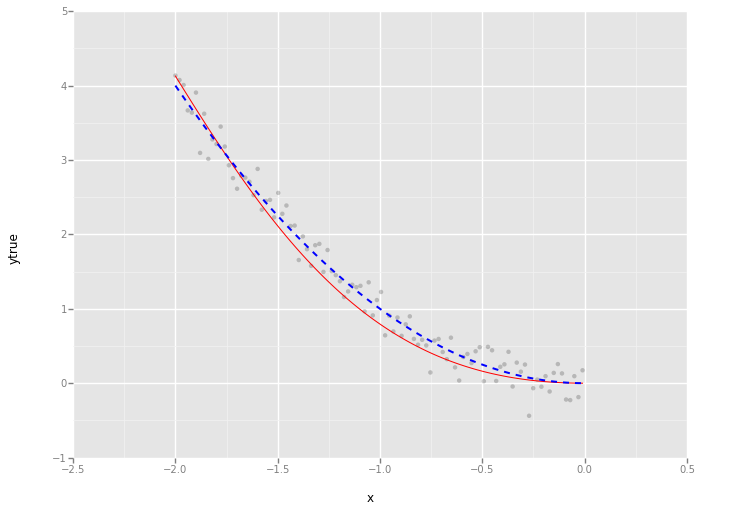

<ggplot: (-9223372036557309566)>

In [152]:
ggplot(aes ('x', 'y'), data=dat) + geom_point (alpha = 0.2) \
        + geom_line (aes ('x', 'yhat'), color = 'red', size = 1) \
        + geom_line (aes ('x', 'ytrue'), color = 'blue', linetype = 'dashed', size = 2)

**Model generalization ability**

In [153]:
X = poly_input(x, deg).values
yfit = lr.predict(X)

In [154]:
lr.score(X_test, y_test)

-0.22537977289962963

In [155]:
dat = pd.DataFrame (np.column_stack ([x, y, yfit, ytrue]), columns =['x', 'y', 'yhat', 'ytrue'])

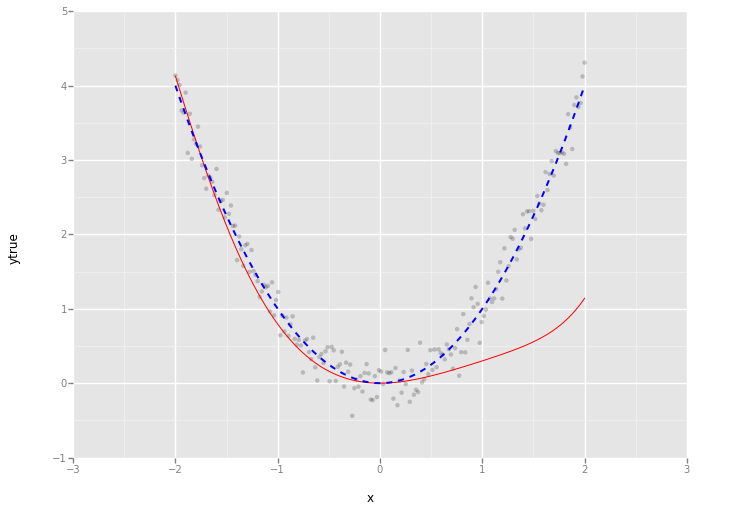

<ggplot: (297258360)>

In [156]:
ggplot(aes ('x', 'y'), data=dat) + geom_point (alpha = 0.2) \
        + geom_line (aes ('x', 'yhat'), color = 'red', size = 1) \
        + geom_line (aes ('x', 'ytrue'), color = 'blue', linetype = 'dashed', size = 2) 

In [157]:
tc = np.zeros(deg+1)
tc[:len(c)] = c

In [158]:
coef_df = pd.DataFrame (np.column_stack ((lr.coef_, tc, np.arange (deg + 1))), columns =['c', 'Tc', 'deg'])
coef_df

,c,Tc,deg
0,0.000000,0.0,0.0
1,0.000000,0.0,1.0
2,0.509710,1.0,2.0
3,-0.251253,0.0,3.0
4,0.037267,0.0,4.0
5,0.000000,0.0,5.0
6,0.000000,0.0,6.0
7,0.004036,0.0,7.0


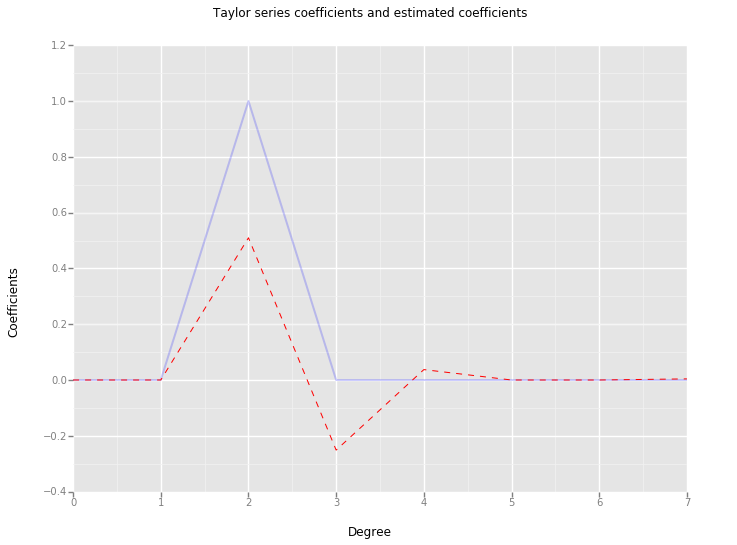

<ggplot: (-9223372036557271001)>

In [159]:
ggplot(aes ('deg', 'Tc'), data=coef_df) + geom_line (color = 'blue', size = 2, alpha = 0.2) \
        + geom_line (aes ('deg', 'c'), color = 'red', linetype = 'dashed', size = 1) + \
        labs (title = 'Taylor series coefficients and estimated coefficients', x = 'Degree', y = 'Coefficients')

In [161]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1., 10., 100.]
coef = []
for alpha in alphas:
    lr = LassoLinearRegression(alpha=alpha)
    yhat = lr.fit(X_train, y_train)
    coef.append(lr.coef_)
coef = np.array(coef)
coef_df = pd.DataFrame(coef)
coef_df['alpha'] = np.log10(alphas)
coef_df

,0,1,2,3,4,5,6,7,alpha
0,-0.127947,-0.525153,0.457160,-0.126157,0.024760,-0.002111,-0.001113,0.000815,-5.0
1,-0.126451,-0.521637,0.458703,-0.126335,0.024748,-0.002085,-0.001108,0.000826,-4.0
2,-0.111481,-0.486477,0.474114,-0.128117,0.024628,-0.001816,-0.001036,0.000945,-3.0
3,0.000000,-0.187761,0.614206,-0.143372,0.022940,0.000000,-0.000200,0.002311,-2.0
4,0.000000,0.000000,0.509710,-0.251253,0.037267,0.000000,0.000000,0.004036,-1.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,-0.159674,0.000000,0.000000,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.037385,1.0
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0


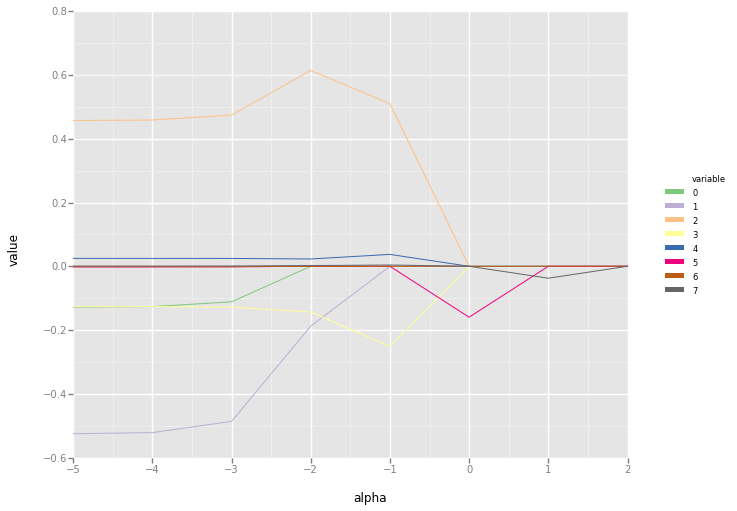

<ggplot: (-9223372036557143124)>

In [162]:
df = pd.melt(coef_df, id_vars=['alpha'])
ggplot(aes(x='alpha', y='value',group='variable', color='variable'), data=df)+geom_path()+scale_color_brewer(type='qual')

**Model complexity selection**

In [163]:
alpha = 0.1
degrees = np.arange(1, 8)
train_score = []
test_score = []
for deg in degrees:
    X_train = poly_input(x_train, deg).values
    X_test = poly_input(x_test, deg).values
    lr = LassoLinearRegression(alpha=alpha)
    yhat = lr.fit(X_train, y_train)
    train_score.append(lr.score(X_train, y_train))
    test_score.append(lr.score(X_test, y_test))
test_score = np.array(test_score)
train_score = np.array(train_score)

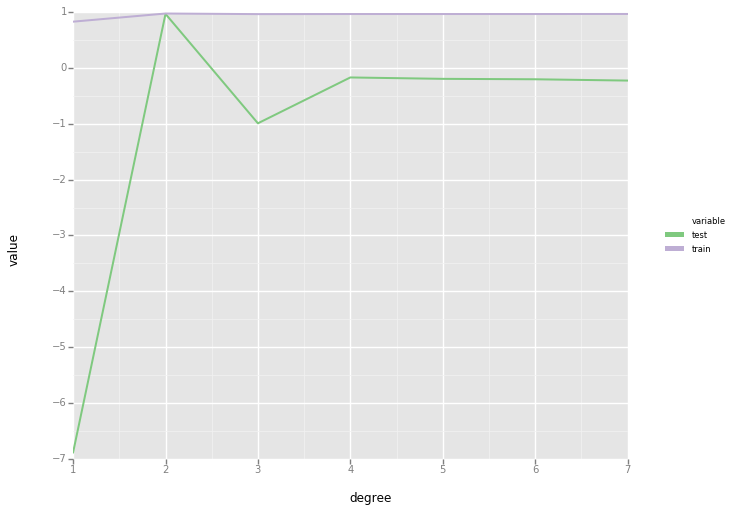

<ggplot: (-9223372036556880945)>

In [164]:
df = pd.DataFrame(np.vstack((train_score, test_score, degrees)).T, columns=['train', 'test', 'degree'])
df = pd.melt(df, id_vars=['degree'])
ggplot(aes(x='degree', y='value',group='variable', color='variable'), data=df)+geom_line(size=2)+scale_color_brewer(type='qual')